In [1]:
!pip install netCDF4

In [2]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import altair as alt
import pandas as pd

In [3]:
fn = '/Users/skurata/Downloads/mdst_tutorials/321P7/mwrret1liljclou/anxmwrret1liljclouM1.c2.20191201.000000.nc'
ds = nc.Dataset(fn)
ds.variables.keys()

dict_keys(['base_time', 'time_offset', 'time', 'sonde_level', 'be_pwv', 'qc_be_pwv', 'be_lwp', 'qc_be_lwp', 'be_retrieval_status', 'cloud_base_height', 'qc_cloud_base_height', 'cloud_temp', 'qc_cloud_temp', 'surface_temp', 'qc_surface_temp', 'surface_vapor_pres', 'qc_surface_vapor_pres', 'surface_pres', 'qc_surface_pres', 'surface_rh', 'qc_surface_rh', 'tbsky23', 'qc_tbsky23', 'tbsky31', 'qc_tbsky31', 'orig_pwv', 'qc_orig_pwv', 'orig_lwp', 'qc_orig_lwp', 'tbsky23_nobias', 'tbsky31_nobias', 'stat2_pwv', 'qc_stat2_pwv', 'stat2_pwv_uncertainty', 'stat2_lwp', 'qc_stat2_lwp', 'stat2_lwp_uncertainty', 'stat2_tliq_status', 'tbsky23_calculated', 'qc_tbsky23_calculated', 'tbsky31_calculated', 'qc_tbsky31_calculated', 'phys_pwv', 'qc_phys_pwv', 'phys_pwv_uncertainty', 'qc_phys_pwv_uncertainty', 'phys_lwp', 'qc_phys_lwp', 'phys_lwp_uncertainty', 'qc_phys_lwp_uncertainty', 'phys_niter', 'qc_phys_niter', 'phys_rms', 'qc_phys_rms', 'phys_converge', 'qc_phys_converge', 'sonde_launch_status', 'sonde_p

Text(0, 0.5, 'Surface Temperature (K)')

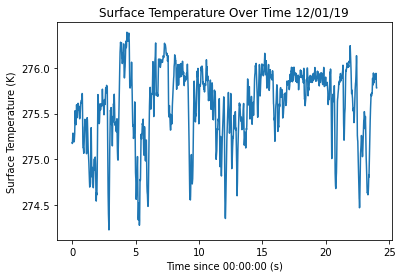

In [4]:
# test plot
x = ds['time'][:] / 3600 # get time in hrs
y = ds['surface_temp'][:]

plt.plot(x, y)
plt.title('Surface Temperature Over Time 12/01/19')
plt.xlabel('Time since 00:00:00 (s)') 
plt.ylabel('Surface Temperature (K)')

Text(0, 0.5, 'Surface Temperature (K)')

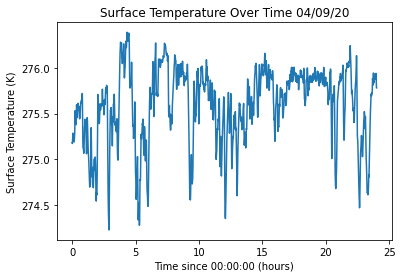

In [5]:
# date of event: 04/09/2020
fn2 = '/Users/skurata/Downloads/mdst_tutorials/321P7/mwrret1liljclou/anxmwrret1liljclouM1.c2.20200409.000000.nc'
ds2 = nc.Dataset(fn)

x2 = ds['time'][:] / 3600 # get time in hrs
y2 = ds['surface_temp'][:]

plt.plot(x2, y2)
plt.title('Surface Temperature Over Time 04/09/20')
plt.xlabel('Time since 00:00:00 (hours)')
plt.ylabel('Surface Temperature (K)')

In [6]:
# using avg dataset to find lowest temp/pressure event
df = pd.read_csv('./DailyData.csv')

# change date form to year-month-date
df['dates'] = df['dates'] + 20000000
df['dates'] = pd.to_datetime(df.dates, format='%Y%m%d')
df['dates'] = df['dates'].dt.strftime('%Y-%m-%d')
list(df.columns)

['dates',
 'be_pwv',
 'qc_be_pwv',
 'be_lwp',
 'qc_be_lwp',
 'be_retrieval_status',
 'cloud_base_height',
 'qc_cloud_base_height',
 'cloud_temp',
 'qc_cloud_temp',
 'surface_temp',
 'qc_surface_temp',
 'surface_vapor_pres',
 'qc_surface_vapor_pres',
 'surface_pres',
 'qc_surface_pres',
 'surface_rh',
 'qc_surface_rh',
 'tbsky23',
 'qc_tbsky23',
 'tbsky31',
 'qc_tbsky31',
 'orig_pwv',
 'qc_orig_pwv',
 'orig_lwp',
 'qc_orig_lwp',
 'tbsky23_nobias',
 'tbsky31_nobias',
 'stat2_pwv',
 'qc_stat2_pwv',
 'stat2_pwv_uncertainty',
 'stat2_lwp',
 'qc_stat2_lwp',
 'stat2_lwp_uncertainty',
 'stat2_tliq_status',
 'tbsky23_calculated',
 'qc_tbsky23_calculated',
 'tbsky31_calculated',
 'qc_tbsky31_calculated',
 'phys_pwv',
 'qc_phys_pwv',
 'phys_pwv_uncertainty',
 'qc_phys_pwv_uncertainty',
 'phys_lwp',
 'qc_phys_lwp',
 'phys_lwp_uncertainty',
 'qc_phys_lwp_uncertainty',
 'phys_niter',
 'qc_phys_niter',
 'phys_rms',
 'qc_phys_rms',
 'phys_converge',
 'qc_phys_converge',
 'sonde_launch_status',
 'sonde

In [7]:
# plot avg surf vapor pressure from Dec - May
chart = alt.Chart(df)
chart.mark_line().encode(
    x='yearmonthdate(dates):T',y='surface_vapor_pres:Q').properties(title="Average Surface Vapor Pressure Over Time")

# plot avg surf vapor pressure in April
april = df[(df['dates'] > '2020-04-01') & (df['dates'] <= '2020-04-30')]
chartApr = alt.Chart(april)
chartApr.mark_line().encode(
    x='date(dates):T',y='surface_vapor_pres:Q').properties(title="Average Surface Vapor Pressure in April")

# found peak pressure Apr. 20, 2020


alt.Chart(...)

In [8]:
# plot avg surf temperature from Dec - May
chart = alt.Chart(df)
chart.mark_line().encode(
    x='yearmonthdate(dates):T',
    y=alt.Y('surface_temp:Q', 
        scale=alt.Scale(domain=(265, 295)))).properties(title="Average Surface Temperature Over Time")

# plot avg surf temperature in April
chartApr.mark_line().encode(
    x='date(dates):T',
    y=alt.Y('surface_temp:Q', 
        scale=alt.Scale(domain=(265, 295)))).properties(title="Average Surface Temperature in April")

# found peak temperature Apr. 20, 2020

alt.Chart(...)